Desain Filter dengan Metode Jendela

    Dimulai dengan filter ideal (sinc), yang panjangnya tak terbatas. Untuk membuatnya menjadi sebab akibat dan untuk mendapatkan pertukaran yang diinginkan antara lebar pita transisi dan redaman stopband, mengalikannya dengan jendela panjang terbatas. Jendela ini dapat diperoleh dengan pengoptimalan, atau dipilih dari salah satu jendela yang sudah dibuat sebelumnya. Filter yang lebih panjang juga menghasilkan pita transisi yang lebih sempit.
    Tanggapan frekuensi yang dihasilkan setelah mengalikan tanggapan impuls ideal (sinc) dengan fungsi jendela adalah konvolusi tanggapan frekuensi ideal dan tanggapan frekuensi jendela. Lebar passband yang dihasilkan adalah lebar passband ideal ditambah lebar passband jendela. Stopband yang dihasilkan dimulai dari frekuensi stopband dari respons frekuensi ideal (frekuensi cutoff) ditambah frekuensi awal stopband dari fungsi jendela (menambahkan band transisi). Untuk mendapatkan passband atau stopband tertentu, hal ini harus diperhitungkan, dan frekuensi cutoff harus dimodifikasi.

    Pada Kaiser Window setidaknya memenuhi persyaratan untuk pelemahan contoh aplikasi downsampling. Bagaimana mendapatkan awal stopband yang benar (untuk melemahkan aliasing untuk downsampling secara memadai) dengan menggunakan metode desain filter kita? 
    Stopband harus dimulai dari 0,5 untuk faktor downsampling N=2. Dengan melihat jendela Kaiser dengan β = 8
kita melihat bahwa kita mendapatkan -60 dB pada frekuensi yang dinormalisasi sekitar 0,36. Oleh karena itu, filter ideal kita harus memiliki ujung pita lolos pada 0,5-0,36 = 0,14 (ingat di sini 1 adalah frekuensi Nyquist), maka ωs = ωc = 0,14π
Perhatikan: di sini kita membutuhkan perkalian dengan pi karena dalam rumus kita, pi adalah frekuensi Nyquist. Sekarang kita hanya perlu memasukkannya ke dalam rumus kita untuk filter ideal (fungsi sinc), dengan L = 16,

h(n)=sin(ωc(n-7.5))/ωc(n-7.5)
untuk n = 0,...,15,
atau, dengan normalisasi yang berbeda agar passband dimulai dari 0 dB:
h(n)=sin(ωc(n-7.5))/π(n-7.5)
(dengan ωc = 0.14π) dan kalikan dengan jendela Kaiser kita.

Dalam iPython:

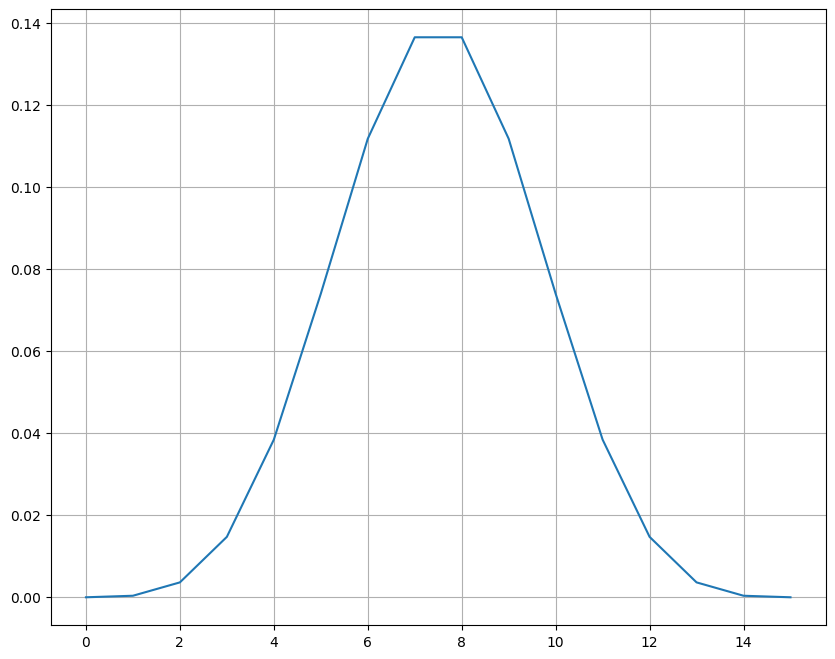

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n=np.arange(16);
h=np.sin(0.14*np.pi*(n-7.5))/(np.pi*(n-7.5));
hk=np.kaiser(16,8);
hfilt=hk*h

plt.figure(figsize=(10,8))
plt.plot(hfilt)
plt.grid()

In [4]:
import scipy.signal as signal

def freqz(x):
    # get frequency bins and according magnitude values 
    f, H = signal.freqz(x)

    #normalized frequency
    fNorm = f/np.pi 

    # magnitude in dB
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" avoids log10(0)!

    # open figure
    plt.figure(figsize=(10,8))

    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')
    plt.axis([0,np.pi,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles)/(2*np.pi)
    plt.plot(f, anglesGrad, 'b')
    plt.axis([0,np.pi,np.min(anglesGrad),np.max(anglesGrad)])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.tight_layout()

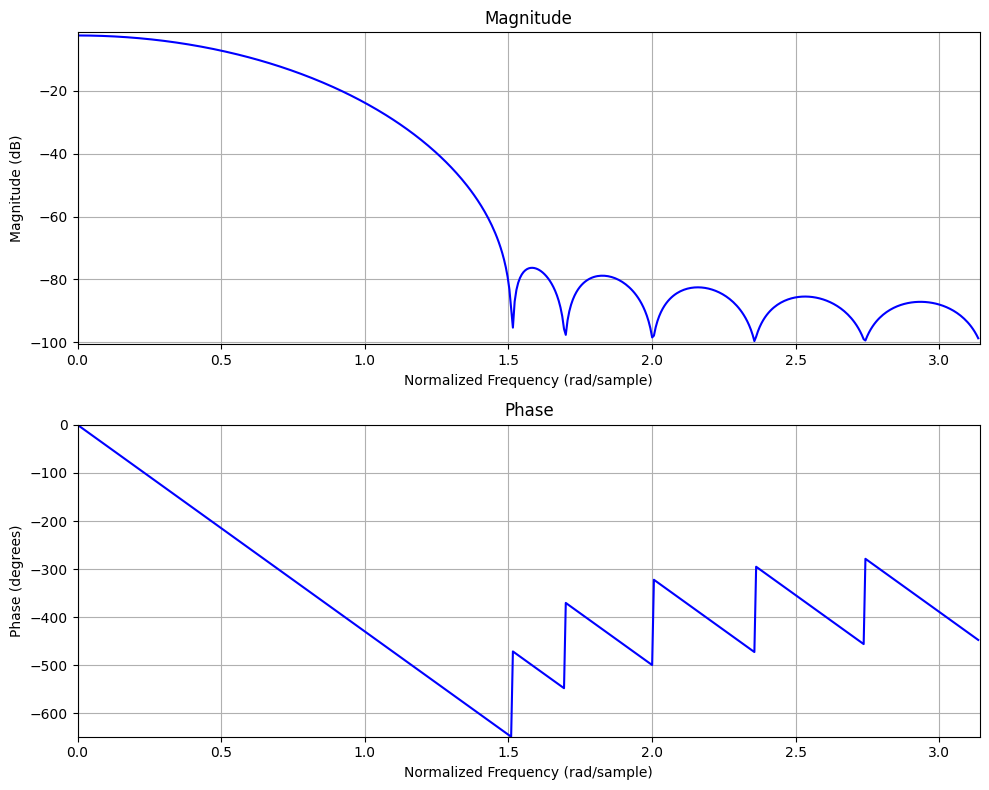

In [6]:
freqz(hfilt)

    Di sini kita melihat bahwa pada frekuensi normalisasi 0,5 memang memiliki redaman yang cukup, sekitar -80 dB! Tetapi pass band (sampai sekitar -6dB) hanya sampai sekitar frekuensi normal 0,15, yang biasanya tidak cukup! Kami tidak benar-benar menentukannya, tetapi untuk tujuan praktis, hal ini biasanya tidak akan berhasil.
Jadi, bagaimana kita dapat meningkatkan pass band sekarang? Karena kita sudah mencoba berbagai kompromi untuk lebar pita transisi dan redaman pita stop, sekarang kita dapat mencoba meningkatkan panjang filter. Cobalah L=32 (bukan 16). Berikut ini adalah jendela Kaiser untuk β = 8 dengan panjang L=32:

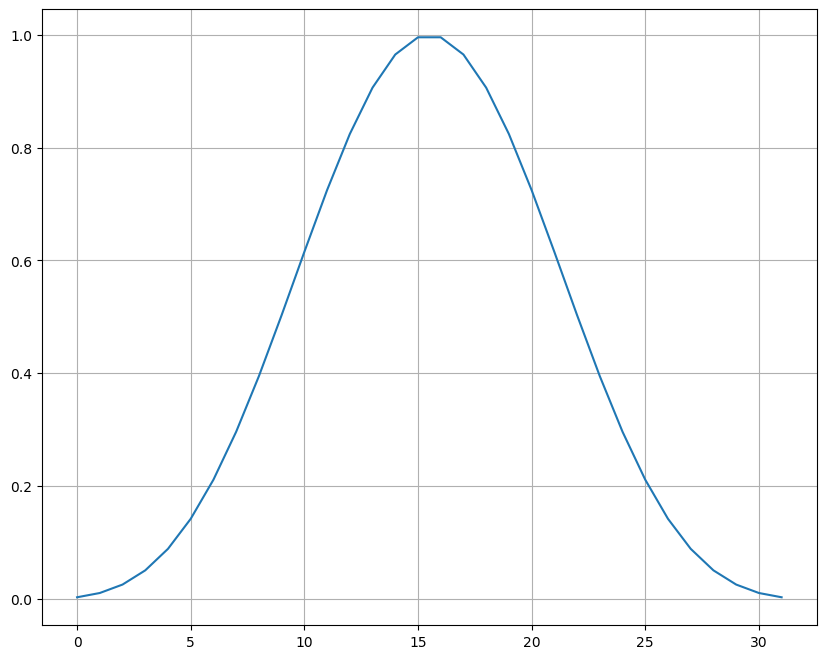

In [7]:
hk=np.kaiser(32,8)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

Respons frekuensinya adalah :

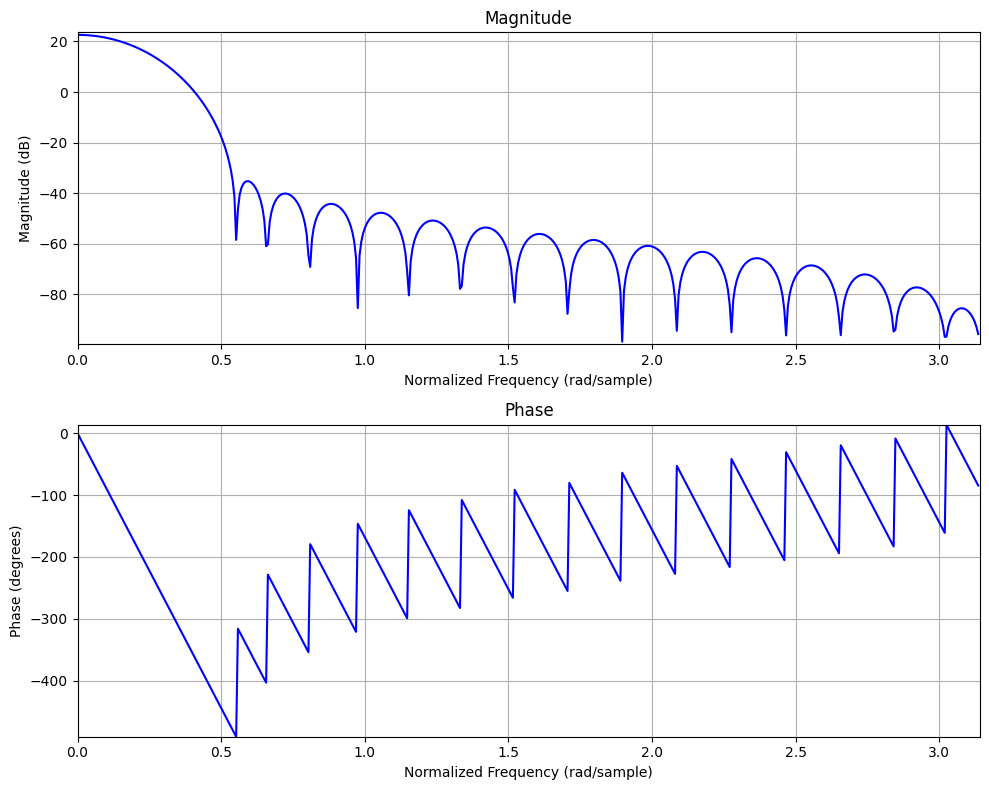

In [8]:
freqz(hk)

    Bisa diamati bahwa lobus utama dari jendela panjang 32 ini (hingga sekitar 0,17) adalah sekitar setengah lebar dari lobus utama pada panjang 16! Dengan cara ini, kita mengurangi separuh lebar transisi dari filter yang dihasilkan. Di sini kita dapat mengatakan bahwa pass band kita berakhir pada frekuensi normal 0,17. Oleh karena itu, kita perlu memiliki filter ideal dengan band stop yang dimulai dari 0,5-0,17 = 0,33, yang menghasilkan rumus untuk respon impuls ideal (seperti di atas untuk filter panjang 16), dengan ωc = 0,33⋅π dan penundaan 31/2 = 15,5:

h(n) = sin(ωc(n-15.5))/π(n-15.5)
untuk n = 0, ... 31,

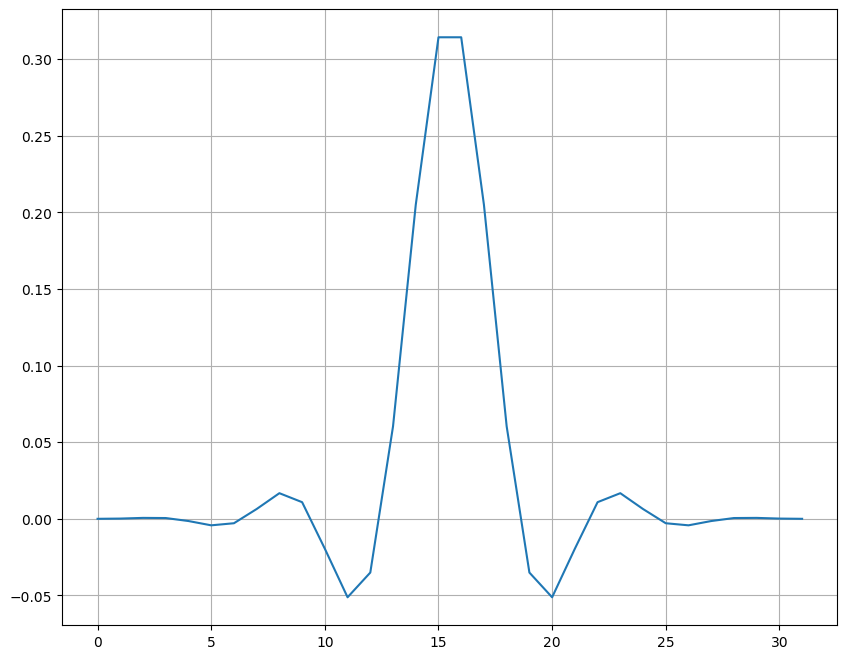

In [9]:
n=np.arange(32);
#ideal impulse response:
h=np.sin(0.33*np.pi*(n-15.5))/(np.pi*(n-15.5));
#Kaiser window:
hk=np.kaiser(32,8);
#multiply ideal filter and Kaiser window:
hfilt=hk*h;
plt.figure(figsize=(10,8))
plt.plot(hfilt)
plt.grid()

Menghasilkan respons impuls sebagai berikut:

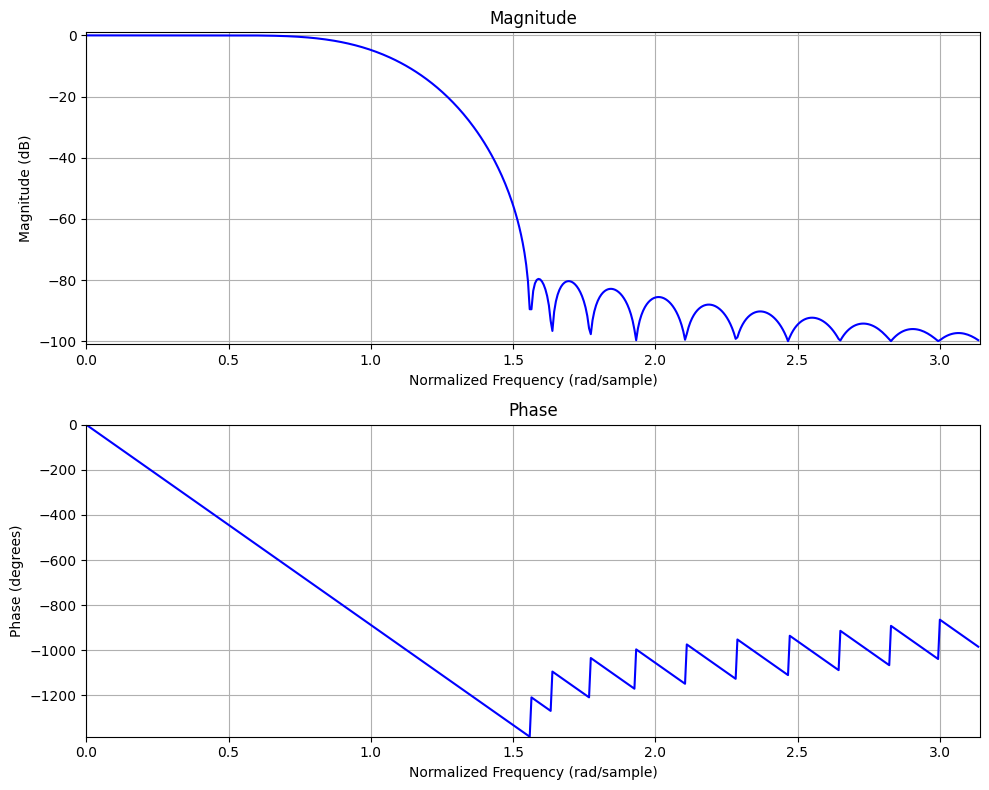

In [10]:
freqz(hfilt)

    Dapat dilihat pada stop band, yang dimulai dari 0,5, memang masih memiliki pelemahan yang cukup, sekitar -80 dB, dan jika engambil 3dB sebagai batas untuk pass band, maka akan naik ke frekuensi ternormalisasi 0,3. Kembali ke contoh downsampling, di mana melakukan downsampling dari 44,1 kHz ke 22,05 kHz sampling rate, frekuensi yang dinormalisasi 0,5 sesuai dengan 11 kHz, dan batas atas pass band adalah 0,3 atau 6,6 kHz. Sekarang ini terlihat seperti filter yang dapat digunakan untuk aplikasi. Hal ini juga menunjukkan mengapa frekuensi yang dapat digunakan dalam representasi waktu-diskrit selalu lebih rendah daripada frekuensi Nyquist (kita membutuhkan filter, yang memiliki pita transisi).

In [12]:
import numpy as np
n=np.arange(32);
#ideal impulse response:
h=np.sin(0.33*np.pi*(n-15.5))/(np.pi*(n-15.5));
#Kaiser window:
hk=np.kaiser(32,8)
#multiply ideal filter and Kaiser window:
hfilt=hk*h

Kita bisa membuat high pass dengan menggunakan modulasi:

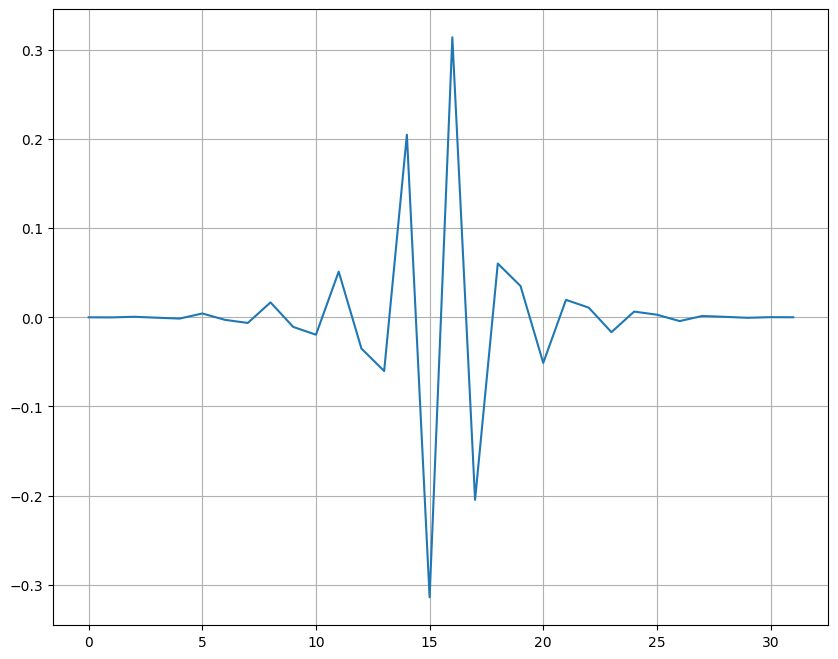

In [13]:
import matplotlib.pyplot as plt
hp=hfilt*np.cos(np.pi *np.arange(32))

plt.figure(figsize=(10,8))
plt.plot(hp)
plt.grid()

Di sini bisa di lihat efek modulasi dengan urutan +/-1.
Respon frekuensi yang dihasilkan adalah:

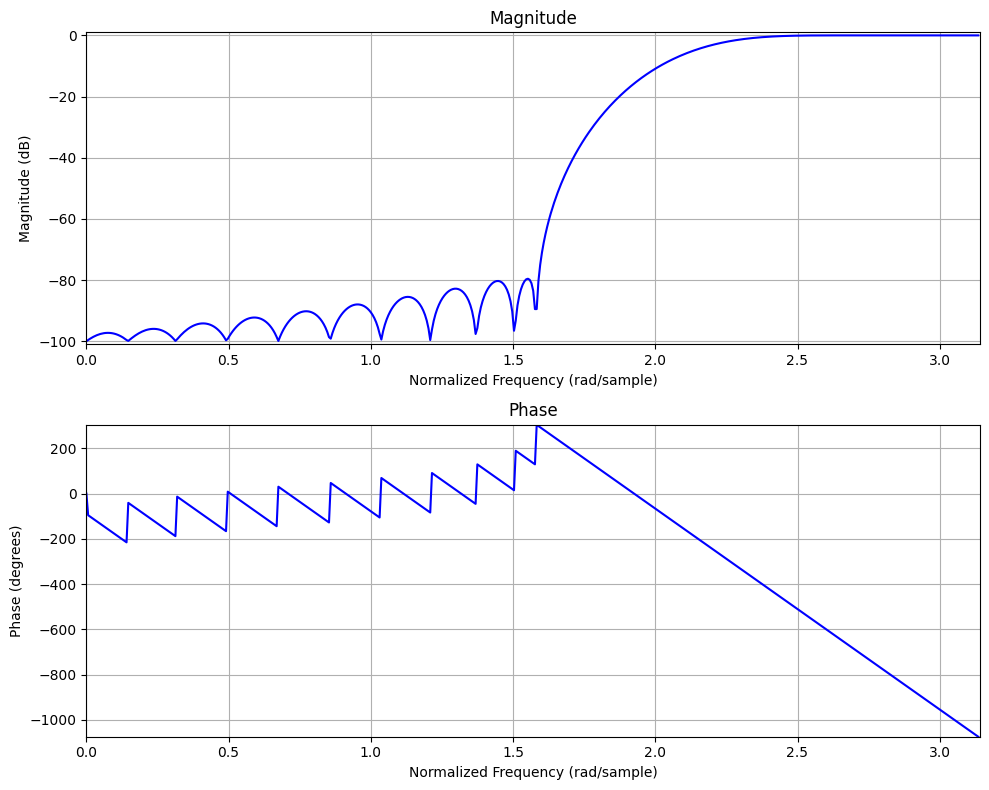

In [14]:
freqz(hp)

    Dapat dilihat bahwa memang memperoleh lintasan yang tinggi. Pada dasarnya ini terlihat seperti cermin di sekitar pusat. Ini benar-benar bergeser, tetapi apa yang dilihat sebagai bagian high pass adalah bagian frekuensi negatif dari low pass.
Kita juga dapat memperoleh band pass dengan frekuensi tengah pi/2 dengan:

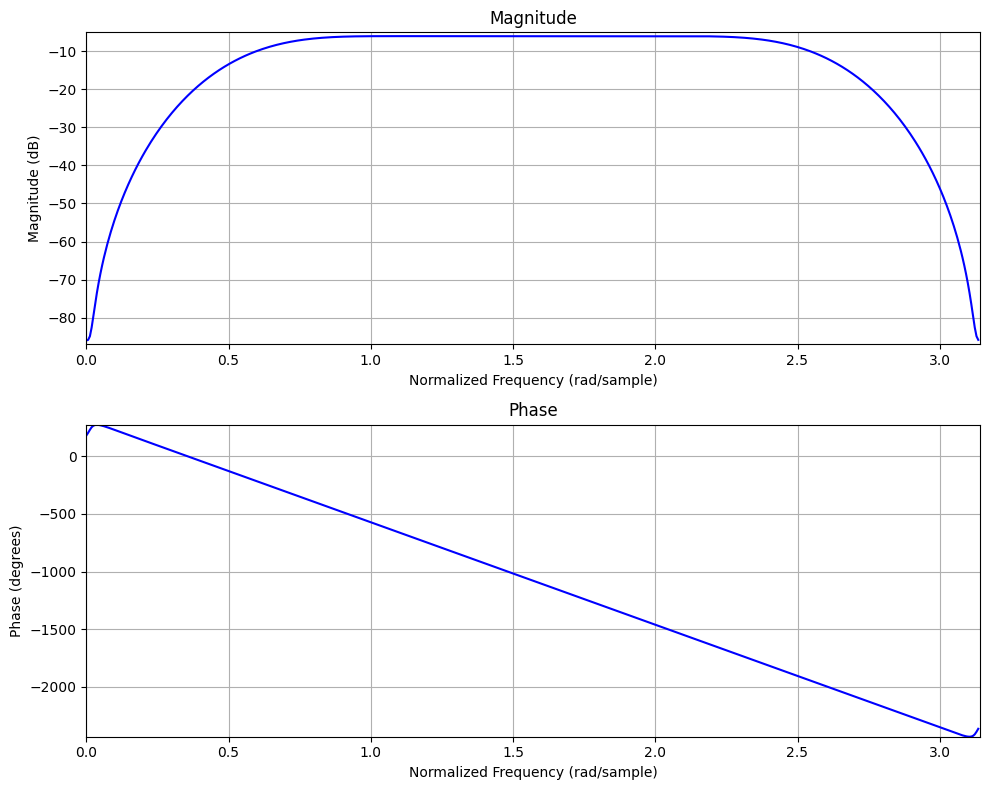

In [15]:
hbp=hfilt*np.cos(np.pi/2 *np.arange(32))
freqz(hbp)

Dan dapat dilihat bahwa kita memang mendapatkan band pass.